# Loan Approval Prediction Model

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### LOADING THE DATASET I WILL USE

In [2]:
df = pd.read_csv("loan.csv")

#### EXPLORE THE DATASET

##### Inspect the data to understand its structure and identify any missing values.

In [3]:
# Display the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check for null values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Loan_Status'>

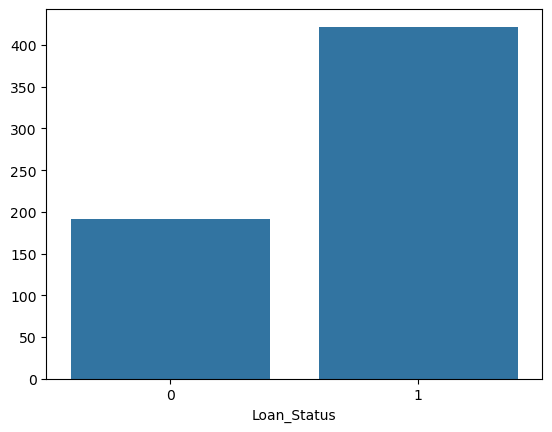

In [34]:
output_count=df["Loan_Status"].value_counts()
sns.barplot(x=output_count.index,y=output_count.values)

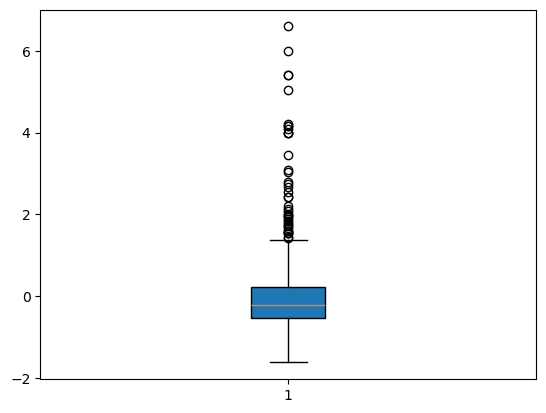

In [35]:
plt.boxplot(df["LoanAmount"].dropna(), patch_artist=True)
plt.show()

In [5]:
# Summary statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Data Preprocessing

##### Handle Missing Values: Fill or drop missing values based on the column's nature.


In [6]:
#Using median because it contains outliers

df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# Fill missing values for categorical columns with the mode

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Drop Unnecessary Columns

##### I will drop The Loan_ID because it serve only as identifiers

In [8]:
# Drop identifier columns
df = df.drop(columns=['Loan_ID'])

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Encode Categorical Data: Convert categorical variables into numerical values.


In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = label_encoder.fit_transform(df[column])

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Replace '3+' with 3 in the 'Dependents' column, if it exists
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)



##### Feature Scaling: Scale numerical features to standardize them.

In [11]:
# Feature scaling
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

#### Split the Data into Training and Testing Sets

##### Separate the target variable Loan_Status from the features.

In [12]:
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']               # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Train the Model

### 1. Random Forest Classifier.

In [13]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123


Confusion Matrix:
 [[19 24]
 [ 3 77]]


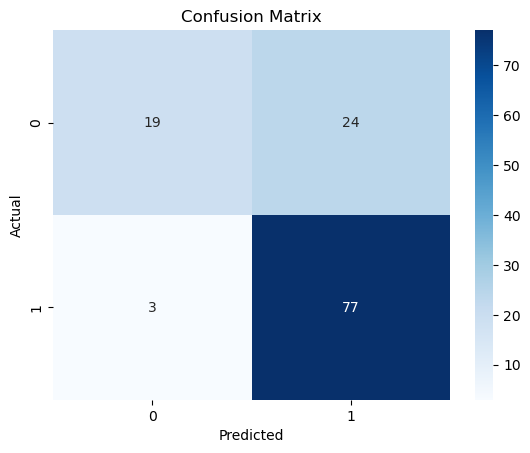

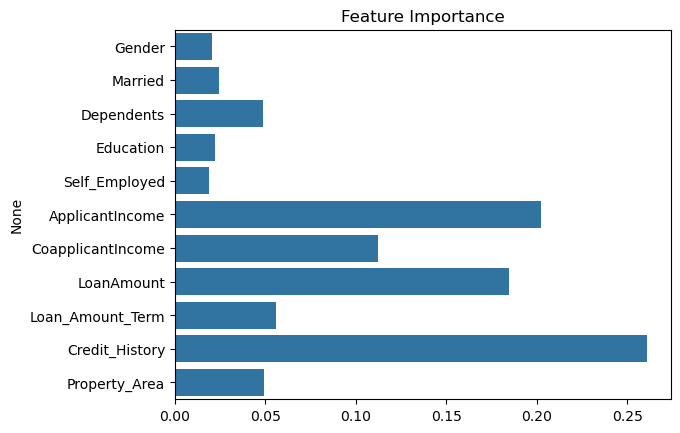

In [15]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importances
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

### 2.  LogisticRegression

In [23]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
 [[18 25]
 [ 1 79]]


Text(0.5, 1.0, 'Confusion Matrix')

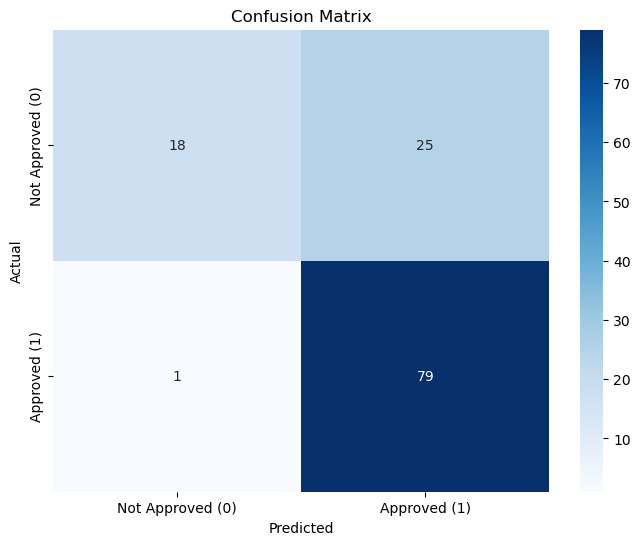

In [28]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,cmap='Blues', 
            xticklabels=['Not Approved (0)', 'Approved (1)'], 
            yticklabels=['Not Approved (0)', 'Approved (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [30]:
import joblib

# Export the model to a file
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model exported successfully as 'logistic_regression_model.joblib'")

Model exported successfully as 'logistic_regression_model.joblib'


In [31]:
import joblib

# Export the model to a file
joblib.dump(model, 'Random_Forest_Classifier_model.joblib')
print("Model exported successfully as Random_Forest_Classifier_model.joblib")

Model exported successfully as Random_Forest_Classifier_model.joblib
